<a href="https://colab.research.google.com/github/td-02/Credit-Risk-Analysis/blob/main/Credit_Risk_Analysis(Exploratory%20Data%20Analysis%20and%20Visualition).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tapesh Chandra Das
RA2111003010206
Abhimanyu Verma
RA2111003010562

In [ ]:

import pandas as pd
from google.colab import drive
from sklearn.model_selection import train_test_split  # Add this import
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt  # Import Matplotlib
import seaborn as sns



In [ ]:
drive.mount('/content/drive')


NameError: ignored

In [ ]:
# Step 2: Load a dataset from Google Drive
dataset_path = '/content/drive/MyDrive/loan/Copy of credit_risk_dataset.csv'

# Load the dataset
data = pd.read_csv(dataset_path)

# Display the first few rows of the dataset to verify it's loaded
print(data.head())

#  Data Exploration


#  check data information and missing values:
print(data.info())
print(data.isnull().sum())

   person_age  person_income person_home_ownership  person_emp_length  \
0          22          59000                  RENT              123.0   
1          21           9600                   OWN                5.0   
2          25           9600              MORTGAGE                1.0   
3          23          65500                  RENT                4.0   
4          24          54400                  RENT                8.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
0    PERSONAL          D      35000          16.02            1   
1   EDUCATION          B       1000          11.14            0   
2     MEDICAL          C       5500          12.87            1   
3     MEDICAL          C      35000          15.23            1   
4     MEDICAL          C      35000          14.27            1   

   loan_percent_income cb_person_default_on_file  cb_person_cred_hist_length  
0                 0.59                         Y                           3  


Data Preprocessing


In [ ]:



# Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)


# Encoding categorical variables
# Use one-hot encoding to convert categorical variables into numerical format
data = pd.get_dummies(data, columns=['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file'])

# Scaling numerical features
# Use one-hot encoding to convert categorical variables into numerical format
data = pd.get_dummies(data, columns=['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file'])


Missing Values:
 person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64


Handling Missing Values

In [ ]:


# Impute missing values for 'person_emp_length' with the mean
mean_emp_length = data['person_emp_length'].mean()
data['person_emp_length'].fillna(mean_emp_length, inplace=True)

mean_int_rate = data['loan_int_rate'].mean()
data['loan_int_rate'].fillna(mean_int_rate, inplace=True)



Model Selection and Building

In [ ]:


# Define the features and target variable
X = data.drop('loan_status', axis=1)
y = data['loan_status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

#  Model Evaluation

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion)
print("Classification Report:\n", classification_rep)


model = LogisticRegression(max_iter=1000)  # Increase max_iter value



Accuracy: 0.8625134264232008
Confusion Matrix:
 [[4832  240]
 [ 656  789]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.95      0.92      5072
           1       0.77      0.55      0.64      1445

    accuracy                           0.86      6517
   macro avg       0.82      0.75      0.78      6517
weighted avg       0.86      0.86      0.85      6517



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


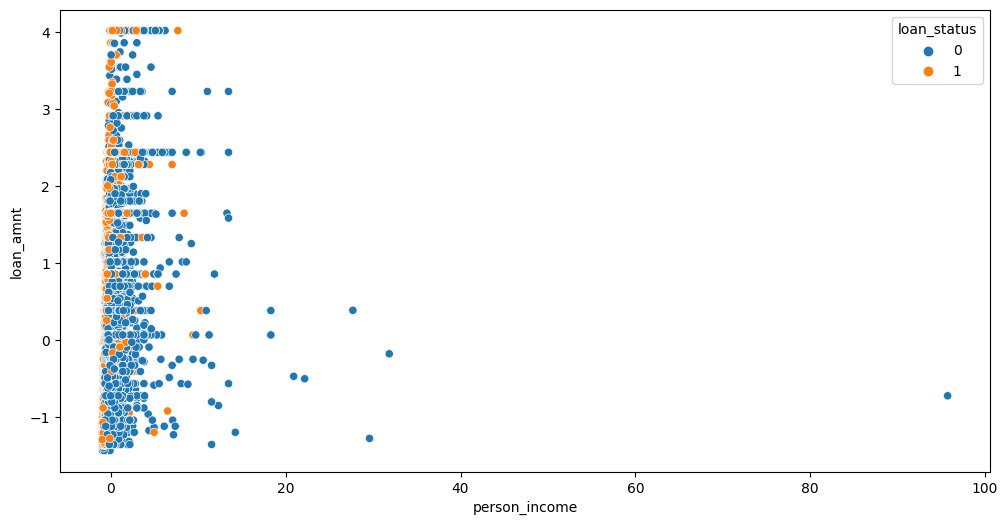

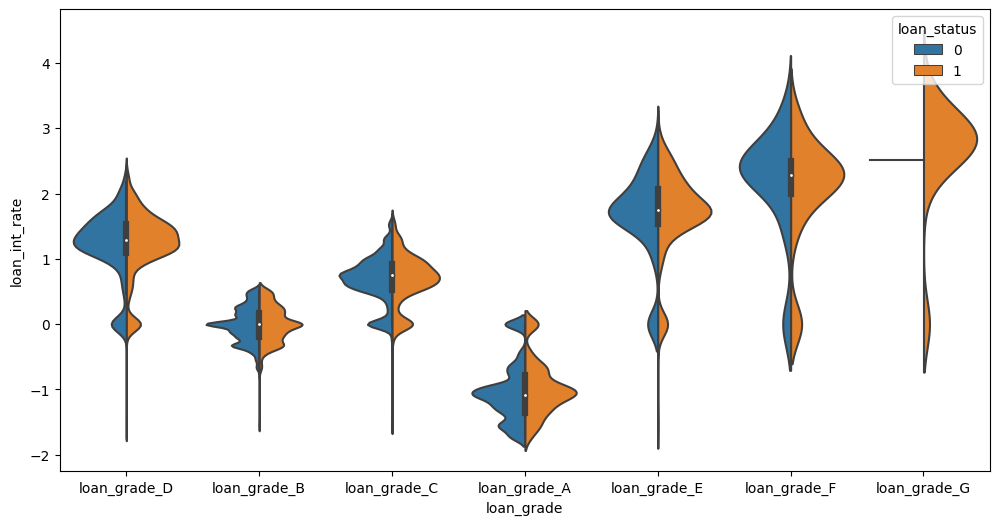

<Figure size 1200x600 with 0 Axes>

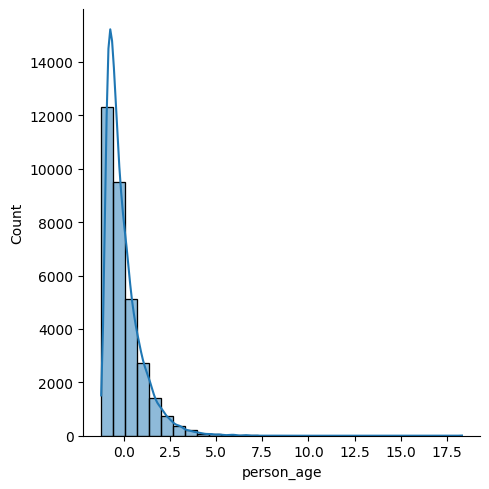

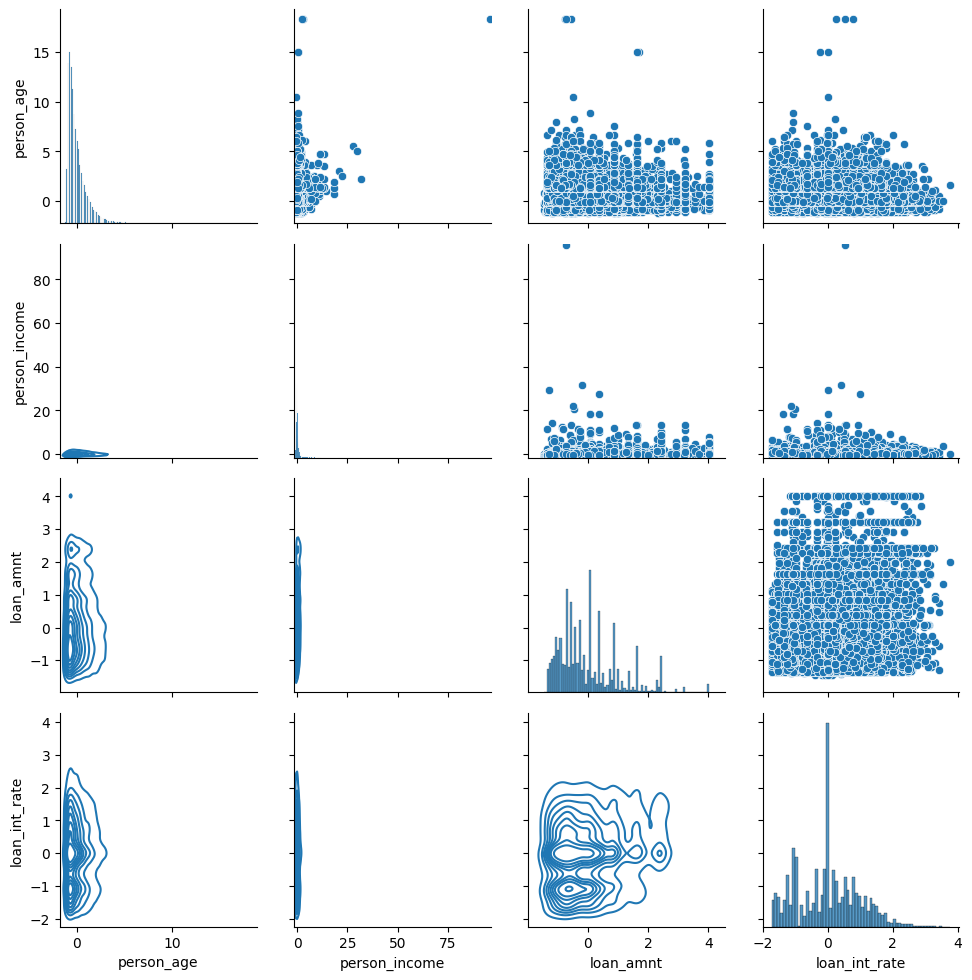

<ipython-input-18-ad6df1d768f0>:30: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


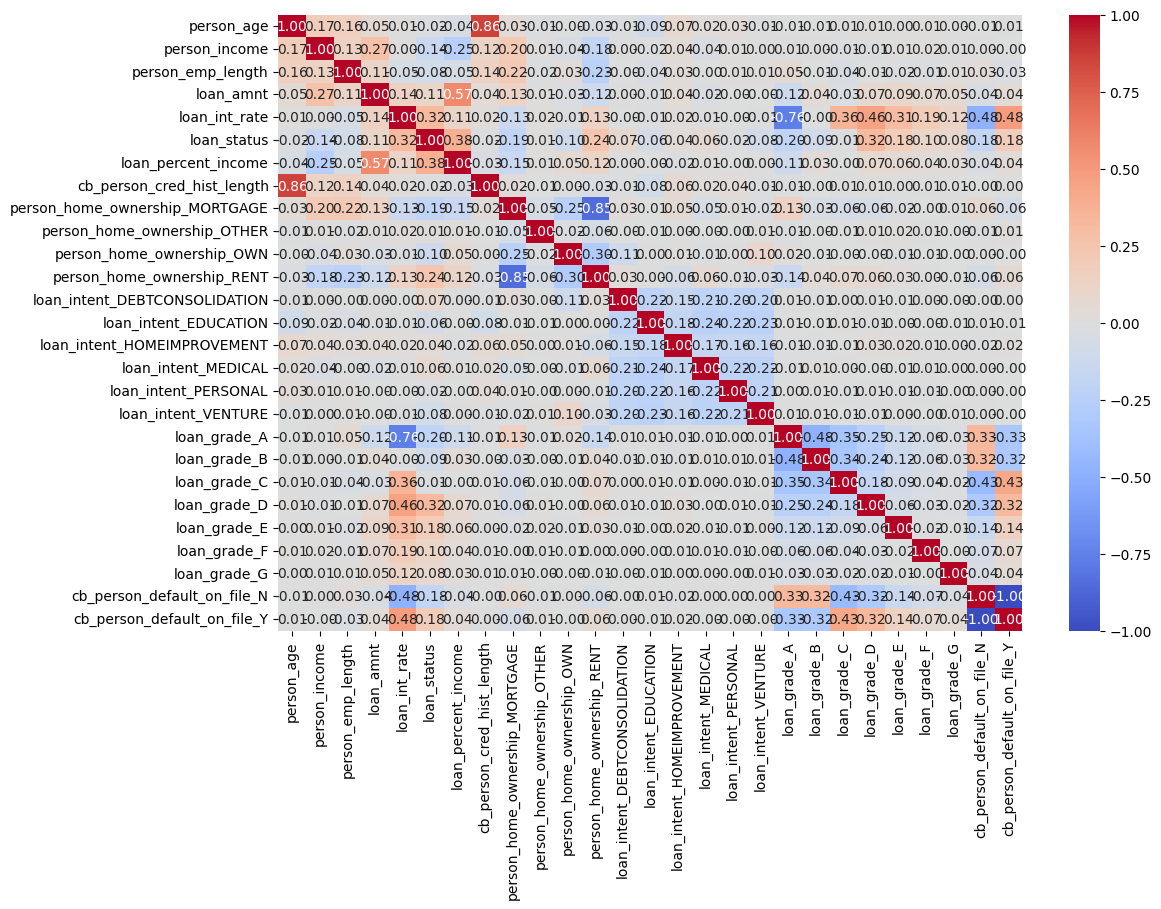

In [ ]:
# Scatter Plots
plt.figure(figsize=(12, 6))
sns.scatterplot(data=data, x='person_income', y='loan_amnt', hue='loan_status')
plt.show()

# Create a new column 'loan_grade' based on one-hot encoded columns
data['loan_grade'] = data[['loan_grade_A', 'loan_grade_B', 'loan_grade_C', 'loan_grade_D', 'loan_grade_E', 'loan_grade_F', 'loan_grade_G']].idxmax(axis=1)

# : Violin Plots with the newly created 'loan_grade' column
plt.figure(figsize=(12, 6))
sns.violinplot(data=data, x='loan_grade', y='loan_int_rate', hue='loan_status', split=True)
plt.show()




# Distribution Plots
plt.figure(figsize=(12, 6))
sns.displot(data['person_age'], bins=30, kde=True)
plt.show()

#  PairGrid
g = sns.PairGrid(data=data, vars=['person_age', 'person_income', 'loan_amnt', 'loan_int_rate'])
g.map_lower(sns.kdeplot)
g.map_diag(sns.histplot, kde_kws={'color': 'k'})
g.map_upper(sns.scatterplot)
plt.show()

# Compute the correlation matrix
correlation_matrix = data.corr()

# Heatmap with Custom Annotations
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.show()

